# 데이터 확인

In [1]:
import pymysql
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# MySQL 연결 정보
DB_HOST = "15.168.145.74" 
DB_USER = "root"  
DB_PASSWORD = "root" 
DB_NAME = "my_db" 

# MySQL에서 데이터 가져오기
conn = pymysql.connect(host=DB_HOST, user=DB_USER, password=DB_PASSWORD, database=DB_NAME)
car_siren = f"SELECT * FROM merge_car_siren"
car_horn = f"SELECT * FROM merge_car_horn"
car_driving = f'SELECT * FROM merge_car_driving_sound'
motorcycle_horn  = f'SELECT * FROM merge_motorcycle_horn'
motorcycle_driving  = f'SELECT * FROM merge_motorcycle_driving_sound'

car_siren_df =  pd.read_sql(car_siren, conn)
car_horn_df = pd.read_sql(car_horn, conn) 
car_driving_df = pd.read_sql(car_driving, conn) 
motorcycle_horn_df= pd.read_sql(motorcycle_horn, conn) 
motorcycle_driving_df = pd.read_sql(motorcycle_driving, conn) 

conn.close()

In [3]:
print(f'car_siren 데이터 개수: {car_siren_df.shape[0]}')
print(f'car_horn 데이터 개수: {car_horn_df.shape[0]}')
print(f'car_driving 데이터 개수: {car_driving_df.shape[0]}')
print(f'motorcycle_horn 데이터 개수: {motorcycle_horn_df.shape[0]}')
print(f'motorcycle_driving 데이터 개수: {motorcycle_driving_df.shape[0]}')

car_siren 데이터 개수: 1990
car_horn 데이터 개수: 3189
car_driving 데이터 개수: 1682
motorcycle_horn 데이터 개수: 4560
motorcycle_driving 데이터 개수: 4735


In [4]:
car_horn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3189 entries, 0 to 3188
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fileName       3189 non-null   object 
 1   labelName      3189 non-null   object 
 2   area_start     3189 non-null   float64
 3   area_end       3189 non-null   float64
 4   category_01    3189 non-null   object 
 5   category_02    3189 non-null   object 
 6   category_03    3189 non-null   object 
 7   decibel        3189 non-null   int64  
 8   soundQuality   3189 non-null   object 
 9   subCategory    3189 non-null   object 
 10  bitRate        3189 non-null   object 
 11  duration       3189 non-null   float64
 12  fileFormat     3189 non-null   object 
 13  fileSize       3189 non-null   int64  
 14  recodingType   3189 non-null   object 
 15  sampleRate     3189 non-null   object 
 16  acqDevice      3189 non-null   object 
 17  acqMethod      3189 non-null   object 
 18  acqType 

In [5]:
car_horn_df.iloc[ : ,-13:] 

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13
0,-328.99643,110.927765,13.474552,37.183453,-10.836115,25.585962,0.232516,5.053774,12.176615,4.831705,-8.831820,10.174751,2.365335
1,-380.94937,82.016785,-38.369390,10.472818,-25.531940,-0.819976,-21.547447,16.138535,-0.490012,0.726548,-9.243734,-1.005557,-10.407813
2,-498.20813,114.061424,1.980113,-2.516794,-12.093688,21.846487,10.806868,14.971516,9.503950,15.538783,15.781241,0.750223,-8.508451
3,-456.39767,111.490440,-6.244432,18.060278,-17.298338,28.503597,14.064431,7.452422,12.441176,16.612614,2.910048,-6.256705,-6.246398
4,-199.50888,199.641110,-13.681638,21.661055,-9.801945,12.513287,2.843365,8.194932,7.828580,8.889499,5.067267,2.928293,10.400720
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3184,-264.83923,197.210750,-77.277880,23.032236,11.380154,7.896886,11.269576,-4.560492,17.224950,4.160231,-1.057662,0.926013,-7.930759
3185,-426.90427,130.722400,47.745327,8.306962,5.675391,15.449170,5.677291,6.208929,-0.195498,-5.397255,-2.674880,-6.652485,-10.272819
3186,-316.11063,194.271060,-29.530697,35.808052,12.489090,23.182838,11.050718,3.705868,11.450807,-0.165664,2.353512,0.390641,5.358946
3187,-228.09323,64.343980,-13.663012,41.246460,-7.827433,21.293640,-13.415158,3.358162,5.326135,-3.165687,-11.261456,-1.512664,6.411310


In [6]:
#데이터프레임 병합 
df_combined = pd.concat([car_horn_df, car_siren_df,car_driving_df,motorcycle_horn_df,motorcycle_driving_df], ignore_index=True)

print(f'df_combined 행 개수: {len(df_combined)}') 
df_combined.head()

df_combined 행 개수: 16156


,fileName,labelName,area_start,area_end,category_01,category_02,category_03,decibel,soundQuality,subCategory,...,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13
0,1.car_horn_30849_1.wav,1.car_horn_30849_1.wav,2.0,11.048,교통소음,자동차,차량경적,68,정상,소형차경적,...,37.183453,-10.836115,25.585962,0.232516,5.053774,12.176615,4.831705,-8.831820,10.174751,2.365335
1,1.car_horn_30865_1.wav,1.car_horn_30865_1.wav,2.0,10.672,교통소음,자동차,차량경적,75,정상,소형차경적,...,10.472818,-25.531940,-0.819976,-21.547447,16.138535,-0.490012,0.726548,-9.243734,-1.005557,-10.407813
2,1.car_horn_30869_1.wav,1.car_horn_30869_1.wav,2.0,12.245,교통소음,자동차,차량경적,68,정상,소형차경적,...,-2.516794,-12.093688,21.846487,10.806868,14.971516,9.503950,15.538783,15.781241,0.750223,-8.508451
3,1.car_horn_30874_1.wav,1.car_horn_30874_1.wav,2.0,10.289,교통소음,자동차,차량경적,69,정상,소형차경적,...,18.060278,-17.298338,28.503597,14.064431,7.452422,12.441176,16.612614,2.910048,-6.256705,-6.246398
4,1.car_horn_59_1.wav,1.car_horn_59_1.wav,2.0,4.029,교통소음,자동차,차량경적,107,정상,소형차경적,...,21.661055,-9.801945,12.513287,2.843365,8.194932,7.828580,8.889499,5.067267,2.928293,10.400720


# 랜덤포레스트 - StandardScaler

클래스 레이블:  ['이륜차경적', '이륜차주행음', '차량경적', '차량사이렌', '차량주행음']
테스트 데이터 정확도: 0.9134


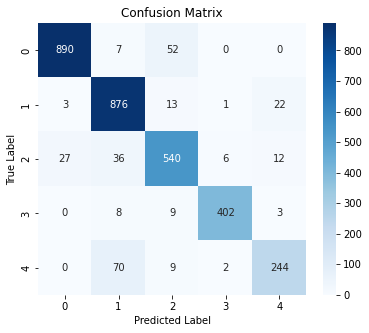


분류 리포트:
              precision    recall  f1-score   support

       이륜차경적       0.97      0.94      0.95       949
      이륜차주행음       0.88      0.96      0.92       915
        차량경적       0.87      0.87      0.87       621
       차량사이렌       0.98      0.95      0.97       422
       차량주행음       0.87      0.75      0.81       325

    accuracy                           0.91      3232
   macro avg       0.91      0.89      0.90      3232
weighted avg       0.91      0.91      0.91      3232



In [7]:
# 레이블(label)과 피처(features) 분리
X = df_combined.iloc[:, -13:]  # 마지막 13개 컬럼을 특성(MFCC)으로 사용
y = df_combined['category_03'].astype('category').cat.codes  # 범주형 데이터를 숫자로 변환

# 데이터셋 분할 (train: 80%, test: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# StandardScaler를 사용하여 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 모델 예측
y_pred = rf_model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"테스트 데이터 정확도: {accuracy:.4f}")

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\n분류 리포트:")
print(classification_report(y_test, y_pred, target_names=class_labels.tolist()))

# GBDT(XGBoost, LightGBM)

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 레이블(label)과 피처(features) 분리
X = df_combined.iloc[:, -13:]  # 마지막 13개 컬럼을 특성(MFCC)으로 사용
y = df_combined['category_03'].astype('category').cat.codes  # 범주형 데이터를 숫자로 변환

# 데이터셋 분할 (train: 80%, test: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 리스트 정의
models = {
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)
}

# 모델 학습 및 평가
for name, model in models.items():
    print(f"\n📌 {name} 모델 학습 중...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # 평가 결과 출력
    acc = accuracy_score(y_test, y_pred)
    print(f"✅ {name} 정확도: {acc:.4f}")
    
    # 혼동 행렬 및 분류 보고서 출력
    print("\nConfusion Matrix:")
    print(pd.DataFrame(confusion_matrix(y_test, y_pred), index=y.unique(), columns=y.unique()))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=df_combined['category_03'].astype('category').cat.categories))



📌 XGBoost 모델 학습 중...
✅ XGBoost 정확도: 0.9010

Confusion Matrix:
     2    3    4    0    1
2  879    9   60    0    1
3    7  852   16    4   36
4   24   39  536    5   17
0    0    6    9  403    4
1    0   74    7    2  242

Classification Report:
              precision    recall  f1-score   support

       이륜차경적       0.97      0.93      0.95       949
      이륜차주행음       0.87      0.93      0.90       915
        차량경적       0.85      0.86      0.86       621
       차량사이렌       0.97      0.95      0.96       422
       차량주행음       0.81      0.74      0.77       325

    accuracy                           0.90      3232
   macro avg       0.89      0.88      0.89      3232
weighted avg       0.90      0.90      0.90      3232


📌 LightGBM 모델 학습 중...
✅ LightGBM 정확도: 0.9208

Confusion Matrix:
     2    3    4    0    1
2  892    5   52    0    0
3    3  859   16    3   34
4   26   25  553    5   12
0    0    4    7  408    3
1    0   51   10    0  264

Classification Report:
           